# CAM304/2024

## REDES NEURAIS E APRENDIZAGEM EM PROFUNDIDADE

## Rede de Convolução / Visão Computacional

### Prof. Eduardo Luz / Eduluz@ufop.edu.br

####        Victor Sampaio Monteiro


Objetivos:

- Aplicação de filtros em imagens por meio de convolução
- Entendimento do uso de stride, padding e pooling
- Modelagem de uma rede de convolução para o problema de rec. de face da AT&T
- Uso do VGG pr-e-treinado como um extrator de caracterĩsticas
- Uso do MobileNet pré-treinado para classificação de faces : transferência de aprenzagem
- Notebook baseado em tensorflow e Keras.

Data da entrega : a ser definido

- Complete o código (marcado com ToDo) e quando requisitado, escreva textos diretamente nos notebooks. Onde tiver *None*, substitua pelo seu código.
- Crie um repositório no github para o grupo e me convide como colaborador (eduluzufop). Por fim, me envie o link do github.

## GitHub criado:
https://github.com/ALPCarrara/CAM304-2024

# 1. Aplicando filtros e entendendo padding, stride e pooling (20pt)

## 1.1. Importando pacotes e montando o drive

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, AvgPool2D
from tensorflow.keras import datasets, layers, models
import os
import skimage
from skimage import io
import numpy as np

In [6]:
from google.colab import files
from PIL import Image

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread
from skimage.transform import resize

## 1.2. Carregando uma imagem

Carregue um imagem do disco, para usar como exemplo.

<ipython-input-11-2bfdccfff8a9>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  sample_image = imread(image_path)


sample image shape:  (320, 350, 3)


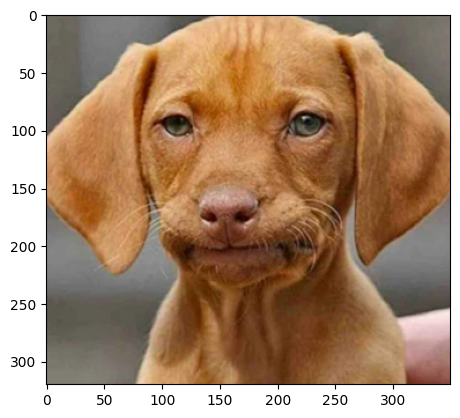

In [11]:
# carrega imagem de exemplo
from matplotlib import pyplot as plt
from imageio import imread
image_path = "/content/DOG.webp"
sample_image = imread(image_path)
sample_image= sample_image.astype(float)

size = sample_image.shape
print("sample image shape: ", sample_image.shape)

plt.imshow(sample_image.astype('uint8'));

In [ ]:
# veja o shape da imagem
sample_image.shape

(360, 260, 3)

## 1.3. Criando e aplicando um filtro com convolução

Utilize o tf/Keras para aplicar o filtro. Observe que nesta etapa não há necessidade de treinamento algum. O código abaixo cria 3 filtros de tamanho 5x5, e adiciona padding de forma a manter a imagem de saída (filtrada) do mesmo tamanho da imagem de entrada (padding ="same").

In [12]:
#cria um objeto sequencial com apenas uma camada de convolução do tipo tf.keras.layers.Conv2D
conv = Sequential([
    Conv2D(filters=3, kernel_size=(5, 5), padding="same",
           input_shape=(None, None, 3))
])
conv.output_shape

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


(None, None, None, 3)

In [13]:
conv.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, None, None, 3)       │             228 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 228 (912.00 B)

 Trainable params: 228 (912.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
# com TF/kertas, as convoluções esperam vetores no formato : (batch_size, dim1, dim2, dim3). Ou seja, a primeria posição é o tamanho do lote.
# Uma imagem isolada é considerada um lote de tamanho 1, portanto, deve-se expandir mais uma dimenão do tensor.
img_in = np.expand_dims(sample_image, 0)
img_in.shape

(1, 320, 350, 3)

Agora, pode-se aplicar a convolução. Aplique a convolução na imagem de exemplo (expandida) e verifique o tamanho da imagem resultante (img_out). Use a função predict do objeto conv para aplicar a convolução.

In [15]:
img_out = conv(img_in)
img_out.shape

TensorShape([1, 320, 350, 3])

Plote as imagens lado a lado e observe o resultado. O parâmetro "same" no padding aplica um padding automático no sentido de garantir que a saída tenha o mesmo tamanho da entrada.
Lembre-se que o padding adiciona zeros nas bordas da imagem, antes da aplicação da convolução.

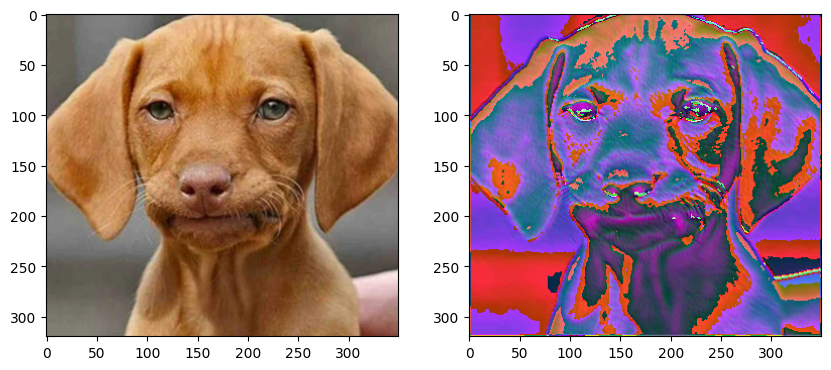

In [16]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(sample_image.astype('uint8'))
ax1.imshow(img_out[0].numpy().astype('uint8'));

Repita o mesmo procedimento, trocando padding de 'same' para 'valid', usando apenas um filtro.

In [17]:
conv2 = Sequential([
    Conv2D(filters=1, kernel_size=(5, 5), padding="valid",
           input_shape=(None, None, 3))
])
conv2.output_shape

(None, None, None, 1)

In [18]:
conv2.summary() # 1 filtro 5x5x3 ... a profundidade do filtro é de acordo com a entrada. 5x5x3 = 75; Não esqueça do bias!


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, None, None, 1)       │              76 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 76 (304.00 B)

 Trainable params: 76 (304.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
img_out = conv2(img_in)
img_out[0].shape

TensorShape([316, 346, 1])

Plote as duas imagens lado a lado

In [20]:
#  Como tivemos que expandir a primeira dimensao para aplicar a convolução, podemos remover a dimensão unitária para plotar a imagem, usando a função squeeze()
i = img_out[0].numpy().squeeze()
i.shape

(316, 346)

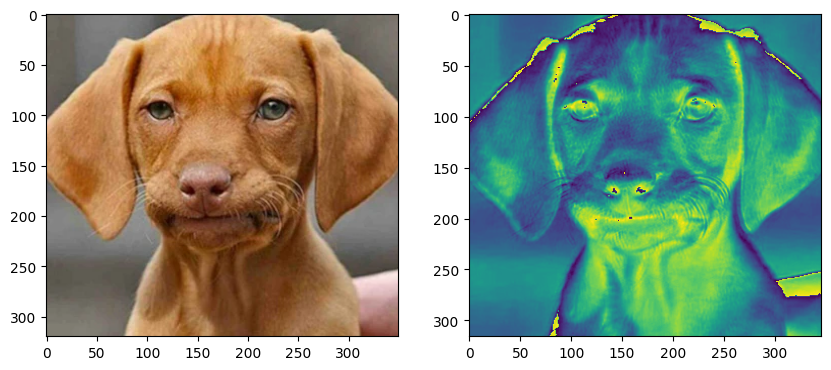

In [21]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(sample_image.astype('uint8'))
i = img_out[0].numpy().squeeze()
ax1.imshow(i.astype('uint8'));

## 1.4. Inicializando os filtros na mão


A função abaixo inicializa um array de dimensões 5,5,3,3 com todas as posições zero, exceto as posições 5,5,0,0 , 5,5,1,1 e 5,5,2,2 que recebem o valor 1/25.

In [22]:
def my_filter(shape=(5, 5, 3, 3), dtype=None):
    array = np.zeros(shape=shape, dtype=np.float32)
    array[:, :, 0, 0] = 1 / 25
    array[:, :, 1, 1] = 1 / 25
    array[:, :, 2, 2] = 1 / 25
    return array

In [23]:
# transposição apenas para ajudar na visualização
np.transpose(my_filter(), (2, 3, 0, 1))

array([[[[0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04]],

        [[0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ]],

        [[0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ]]],


       [[[0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ]],

        [[0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
      

In [24]:
# a função definida acima é usada para carregar valores nos filtros.
# use a função my_filter() para pre-inicializar os filtros do objeto conv3.
#
conv3 = Sequential([
     Conv2D(filters=3, kernel_size=(5, 5), padding="same",
           input_shape=(None, None, 3), kernel_initializer=my_filter)
])
conv3.output_shape

(None, None, None, 3)

## 1.5. Plote e observe o que aconte com a imagem (1pt)



Foi observada uma redução da nitidez na imagem.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


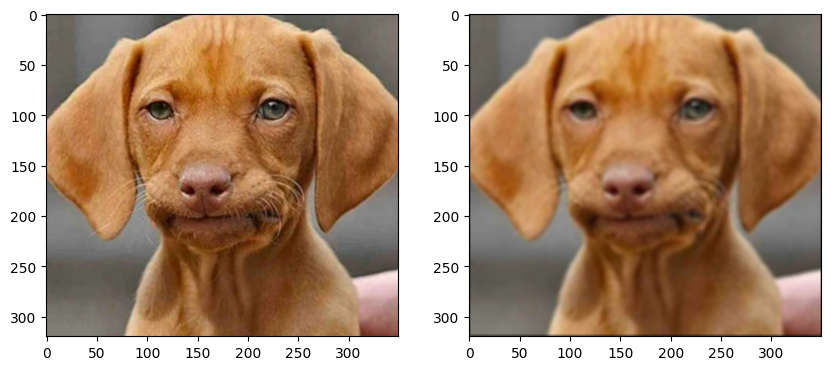

In [25]:
# observe o que aconte com a imagem
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(img_in[0].astype('uint8'))
ax1.imshow(conv3.predict(img_in)[0].astype('uint8'));

### Responda

**ToDo** : Descreva suas observações sobre a imagem anterior.
###Resposta:

###Estamos visualizando a imagem original a esquerda e uma outra imagem a direita processada pelo terceiro modelo convolucional (conv3), sendo um modelo que utiliza um filtro personalizado que é uma média simples que suaviza a imagem, reduzindo ruídos e detalhes finos.
###A imagem filtrada (à direita) está mais suave em comparação com a imagem original (à esquerda) com redução de visualização dos detalhes finos, fazendo com que bordas e contornos possam parecer menos nítidos, e ruídos que percebemos em áreas com variações sutis de cor ou textura.
###Podemos observar também que as cores na imagem filtrada podem parecer mais uniformes, com transições mais suaves entre diferentes áreas de cor.

## 1.6. Filtros de borda (5pt)

**ToDo** : Crie uma nova função para gerar um filtro de borda nos 3 canais da imagem de entrada. O filtro deve ser 3x3 e ter o formato [[0 0.2 0] [0 -0.2 0] [0 0 0]] (2pt)

In [26]:
#def my_new_filter(shape=(1, 3, 3, 3), dtype=None):
#    None
#    return None

#Resposta

def my_new_filter(shape=(3, 3, 3, 3), dtype=None):
    array = np.zeros(shape=shape, dtype=np.float32)
    filter_values = np.array([[0, 0.2, 0], [0, -0.2, 0], [0, 0, 0]])
    for i in range(3):  # Aplicar o filtro em cada canal
        array[:, :, i, i] = filter_values
    return array

Inicialize o objeto conv4 com seu novo filtro e aplique na imagem de entrada

In [27]:
conv4 = Sequential([
    Conv2D(filters=3, kernel_size=(3, 3), padding="same",
           input_shape=(None, None, 3), kernel_initializer=my_new_filter)
])
conv4.output_shape

(None, None, None, 3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


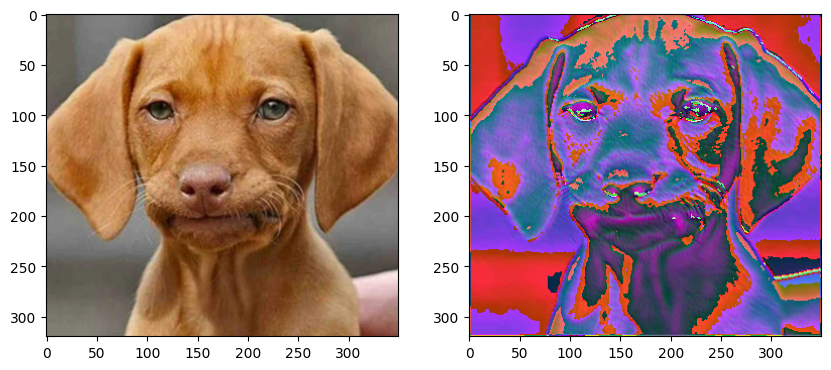

In [28]:
# Plote as duas iamgens lado a lado (filtrada e não filtrada)
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(img_in[0].astype('uint8'))
ax1.imshow(conv.predict(img_in)[0].astype('uint8'));

## 1.7. Pooling (14pt)



Aplique um max-pooling na imagem, com uma janela de 2x2. Faça com stride de 2 e observe o resultado na imagem de saída.

In [29]:
# cria um objeto Sequencial de nome max_pool, apenas contendo uma camada de tf.keras.layer.MaxPool2D.
# lembre-se de colucar o parametro input-shape como input_shape=(None, None, 3)

#Resposta

max_pool = Sequential([
    MaxPool2D(pool_size=(2, 2), strides=2, input_shape=(None, None, 3))
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/pooling/base_pooling.py:23: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(name=name, **kwargs)


In [30]:
img_in = np.expand_dims(sample_image, 0) # expande a imagem
img_out = max_pool.predict(img_in) # aplica o pooling

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


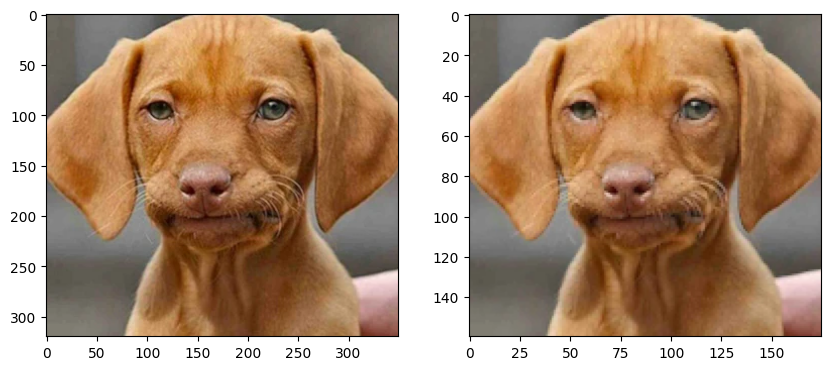

In [31]:
# plota as imagens lado a lado
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(img_in[0].astype('uint8'))
ax1.imshow(img_out[0].astype('uint8'));

Aumente o stride para 4, repita o processo e observe o resultado na imagem de saída.




In [32]:
# cria um objeto Sequencial de nome max_pool, apenas contendo uma camada de tf.keras.layer.MaxPool2D.
# lembre-se de colucar o parametro input-shape como input_shape=(None, None, 3)
# Coloque o parametro stride para 4

#Resposta
max_pool2 = Sequential([
    MaxPool2D(pool_size=(2, 2), strides=4, input_shape=(None, None, 3))
])

In [33]:
img_in = np.expand_dims(sample_image, 0) # expande a imagem
img_out = max_pool2.predict(img_in) # aplica o pooling

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


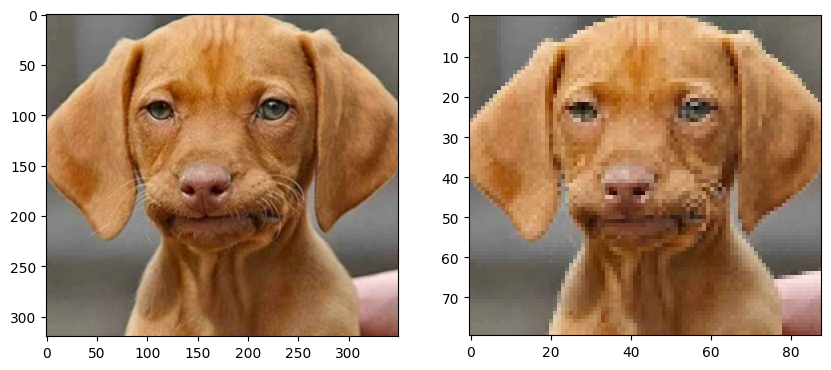

In [34]:
# plota as imagens lado a lado
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(img_in[0].astype('uint8'))
ax1.imshow(img_out[0].astype('uint8'));

Aumente o stride para 8, repita o processo e observe o resultado na imagem de saída. A

In [35]:
# cria um objeto Sequencial de nome max_pool, apenas contendo uma camada de tf.keras.layer.MaxPool2D.
# lembre-se de colucar o parametro input-shape como input_shape=(None, None, 3)
# Coloque o parametro stride para 8

#Resposta
max_pool3 = Sequential([
    MaxPool2D(pool_size=(2, 2), strides=8, input_shape=(None, None, 3))
])

In [36]:
img_in = np.expand_dims(sample_image, 0) # expande a imagem
img_out = max_pool3.predict(img_in) # aplica o pooling

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


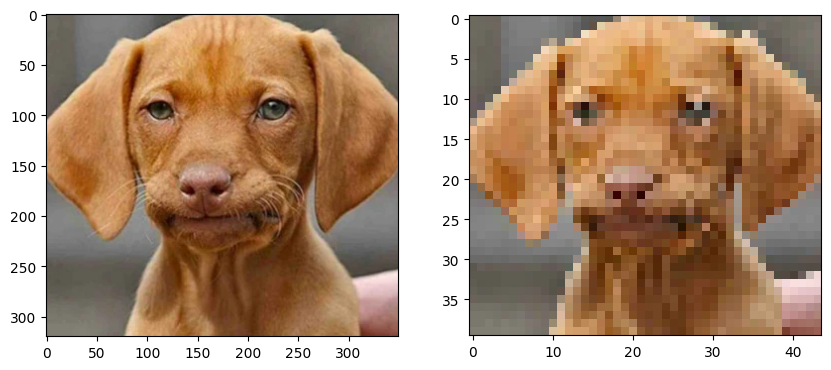

In [37]:
# plota as imagens lado a lado
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(img_in[0].astype('uint8'))
ax1.imshow(img_out[0].astype('uint8'));

### Responda

**ToDo** - Descreva o que aconteceu com o aumento do stride.

###Resposta

### Quando o valor do stride é aumentado durante o pooling, a principal consequência é a diminuição da resolução espacial da imagem resultante conforme os valores que aplicamos:

### 1. **Stride 2**:
###  - A figura é diminuída pela metade em ambas as direções (horizontal e vertical).
###  - Isso quer dizer que a cada par de pixels na foto original, somente um é preservado na foto final.
###  - A figura final ainda preserva diversos pormenores, porém com uma qualidade de imagem reduzida.

### 2. **Stride 4**:
###  - A figura é diminuída para um quarto de suas dimensões originais em cada direção.
###  - A cada quatro pontos na imagem inicial, somente um é preservado na imagem final.
###  - A foto final perde mais informações e a qualidade fica ainda mais baixa.

### 3. **Stride 8**:
###  - A figura é diminuída para um oitavo do tamanho inicial em cada direção.
###  - A cada oito pontos na imagem inicial, apenas um permanece na imagem final.
###  - A foto final perde muitos detalhes e a qualidade é consideravelmente reduzida.

### Simplificando, quando o passo é aumentado durante o agrupamento, a imagem resultante tem uma menor resolução espacial, o que pode ajudar a reduzir a quantidade de dados e a complexidade computacional em redes neurais, porém com o custo de perder detalhes na imagem.

# 2. Reconhecimento de Faces usando uma rede de convolução (20pt)




O objetivo desta etapa é classificar faces na base ORL (AT&T) Database (40 individuos x 10 imagens, de resolução 92x112 pixels e 256 níveis de cinza).

Baixe as imagens no site http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html ou da pasta dataset do Drive.

## 2.1. Preparando os dados (5pt)

In [105]:
# carregue as imagens

# inicializa matrizes X e y
X = np.empty([400, 112, 92]) # 40 classe com 10 imgs cada, 10304 = 112x92
y = np.empty([400, 1])

# percorre todos os diretorios da base att e carrega as imagens
imgs_path = "/content/att-faces"
i=0
class_id = 0
for f in os.listdir(imgs_path):
    #print(f)
    if f.startswith("s"):
        class_id = class_id + 1
        for img_path in os.listdir(os.path.join(imgs_path,f)):
            if img_path.endswith(".pgm"):
                #print(img_path)
                X[i, :, :] = io.imread(os.path.join(imgs_path,f,img_path))
                y[i, :] = class_id
                i = i + 1


print("dimensões da matriz X = " , X.shape)

dimensões da matriz X =  (400, 112, 92)


In [106]:
# Divida os dados em treino e teste (70%-30%) com a função train_test_split

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split( #Todo : complete

#Resposta

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=42)

In [107]:
print("Dimensões do conjunto de treino X:", X_train.shape)
print("Dimensões do conjunto de teste X:", X_test.shape)
print("Dimensões do conjunto de treino y:", y_train.shape)
print("Dimensões do conjunto de teste y:", y_test.shape)

Dimensões do conjunto de treino X: (280, 112, 92)
Dimensões do conjunto de teste X: (120, 112, 92)
Dimensões do conjunto de treino y: (280, 1)
Dimensões do conjunto de teste y: (120, 1)


In [108]:
X_train.shape

(280, 112, 92)

In [109]:
X_test.shape

(120, 112, 92)

## 2.2. Implementando a rede (15pt)

Implemente uma rede de convolução simples, contendo 3 camadas de convolução seguidas de camadas max-pooling. Duas camadas densas (totalemtne conectadas) no final e por fim uma camada com ativação softmax para a classificação. Escolha filtros de tamanhos variados : (3,3) ou (5,5). Para cada camada, crie de 32 a 96 filtros.
Na camada densa, use de 64 a 200 neurônios.

Use o comando model.summary() para conferir a arquitetura.

In [110]:
# Implementa uma rede de convolução simples, chamada model

input_size = (X.shape[1], X.shape[2],1)
n_classes = 40

model = models.Sequential()

#Resposta

model.add(layers.InputLayer(input_shape=input_size))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# ToDo : adicionar as outras camadas
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten()) # não esqueça da camada flatten ..

model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dense(units=n_classes, activation='softmax'))

model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 112, 92, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 56, 46, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 56, 46, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 28, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 41216)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │       5,275,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 40)                  │           5,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,299,752 (20.22 MB)

 Trainable params: 5,299,752 (20.22 MB)

 Non-trainable params: 0 (0.00 B)

Seu modelo deve ter uma saída aproximadamente como abaixo:



```
Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_60 (Conv2D)           (None, 110, 90, 32)       320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 55, 45, 32)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 53, 43, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 26, 21, 64)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 24, 19, 64)        36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 29184)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                1867840   
_________________________________________________________________
dense_10 (Dense)             (None, 40)                2600      
=================================================================
Total params: 1,926,184
Trainable params: 1,926,184
Non-trainable params: 0
_________________________________________________________________
```



In [111]:
# repare bem o shape de x_train. A priumeira dimensão é o tamanho do lote, a segunda e terceira são referentes ao taamnho das imagens.
# repare que as imagens desta base tem apenas uma banda (escala de cinza)
X_train.shape

(280, 112, 92)

In [112]:
# Como o tensor acima não contempla o tamanho de canais (no caso , igual a 1), deve-se expandir a última dimensão para deixar a entrada compatĩvel com o que é esperado pelo modelo do tf.keras
#Resposta
X_train_new = np.expand_dims(X_train, axis=-1)
X_test_new = np.expand_dims(X_test, axis=-1)

print("Nova forma de X_train:", X_train_new.shape)
print("Nova forma de X_test:", X_test_new.shape)

X_train_new.shape

Nova forma de X_train: (280, 112, 92, 1)
Nova forma de X_test: (120, 112, 92, 1)


(280, 112, 92, 1)

In [113]:
# o vetor de rótulos não precisa ter duas diemnões.
#y_train_new = y_train.squeeze()
#y_test_new = y_test.squeeze()
y_train_new = y_train.squeeze().astype(np.int32)
y_test_new = y_test.squeeze().astype(np.int32)

# e deve ficar na faixa entre 0 e 39
#y_train_new = y_train_new - 1;
#y_test_new = y_test_new - 1;
y_train_new = np.clip(y_train_new, 0, 39)
y_test_new = np.clip(y_test_new, 0, 39)

<ipython-input-113-232442bf9562>:4: RuntimeWarning: invalid value encountered in cast
  y_train_new = y_train.squeeze().astype(np.int32)
<ipython-input-113-232442bf9562>:5: RuntimeWarning: invalid value encountered in cast
  y_test_new = y_test.squeeze().astype(np.int32)


Compile o modelo usando o método de otimização=adam e função de custo (loss) = sparse_categorical_crossentropy.

In [115]:
#Resposta
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Verificando o resumo do modelo
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 112, 92, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 56, 46, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 56, 46, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 28, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 41216)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │       5,275,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 40)                  │           5,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,299,752 (20.22 MB)

 Trainable params: 5,299,752 (20.22 MB)

 Non-trainable params: 0 (0.00 B)

Treine o modelo por 30 épocas com batch_size = 100.

In [116]:
#Resposta
history = model.fit(
    X_train_new, y_train_new,
    epochs=30,
    batch_size=100,
    validation_data=(X_test_new, y_test_new)
)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.4434 - loss: 283.0638 - val_accuracy: 1.0000 - val_loss: 3.4107
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.9970 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.9970 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.9945 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.9970 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9982 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9945 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.9945 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accu

O retorno da função fit() é um objeto para armazenar o histõrico do treino.

In [117]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plote a acurácia e o custo (loss) do treino e da validação.

4/4 - 0s - 112ms/step - accuracy: 1.0000 - loss: nan


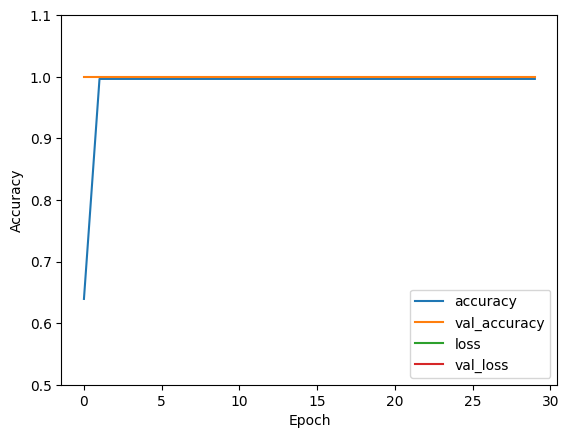

In [118]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.1])
plt.legend(loc='lower right')

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test_new,  y_test_new, verbose=2)

In [119]:
print(test_acc)

1.0


# 3. Usando um modelo Pré-treinado : VGG (10pt)

Carregando os dados da base AT&T para o VGG. Como a base está em escala de cinza e a entrada do modelo VGG espera uma imagem colorida (RGB), vamos repetir a mesma imagem em cada uma das bandas.

## 3.1. Preparando os dados (2pt)


In [122]:
# inicializa matrizes X e y
X = np.empty([400, 112, 92, 3]) # 40 classe com 10 imgs cada, 10304 = 112x92
y = np.empty([400, 1])

# percorre todos os diretorios da base att e carrega as imagens
imgs_path = "/content/att-faces"
i=0
class_id = 0
for f in os.listdir(imgs_path):
    #print(f)
    if f.startswith("s"):
        class_id = class_id + 1
        for img_path in os.listdir(os.path.join(imgs_path,f)):
            if img_path.endswith(".pgm"):
                #print(img_path)
                # copia msg imagem para os 3 canais
                X[i, :, :,0] = io.imread(os.path.join(imgs_path,f,img_path))
                X[i, :, :,1] = io.imread(os.path.join(imgs_path,f,img_path))
                X[i, :, :,2] = io.imread(os.path.join(imgs_path,f,img_path))
                y[i, :] = class_id-1
                i = i + 1


In [123]:
# divida em 70% treino e 30% teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=42)

X_train.shape

(280, 112, 92, 3)

## 3.2. Carrando o VGG direto da biblioteca do tensorflow (2pt)

In [124]:
# https://www.tensorflow.org/guide/keras/functional?hl=pt_br

from tensorflow.keras.applications import VGG19
vgg19 = VGG19()

In [125]:
vgg19.summary() # repare a quantidade de parãmetros!

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 143,667,240 (548.05 MB)

 Trainable params: 143,667,240 (548.05 MB)

 Non-trainable params: 0 (0.00 B)

Vamos descartar as duas últimas camadas do VGG

In [131]:
# https://www.tensorflow.org/guide/keras/functional?hl=pt_br
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

input_shape = (112, 92, 3)
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)
vgg_face_descriptor = Model(inputs=vgg19.input, outputs=vgg19.layers[-2].output)


vgg_face_descriptor.summary()

Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)          │ (None, 112, 92, 3)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 112, 92, 64)         │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 112, 92, 64)         │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 56, 46, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 56, 46, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 56, 46, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 28, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 28, 23, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 28, 23, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 28, 23, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 28, 23, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 14, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 14, 11, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 14, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 14, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 14, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 7, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 7, 5, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 7, 5, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 7, 5, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 7, 5, 512)           │       2,359,808 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

### Responda

**ToDo** - Por que descartamos as duas últimas camadas do VGG?
###Resposta

###Eliminando as duas últimas camadas do VGG19, que são camadas totalmente conectadas, podemos observar:

###1. **Extração de recursos**: as camadas de convolução do VGG19 são ótimas para extração de recursos de imagens ricas e detalhadas. Ao remover as camadas densas finais, podemos usar esses recursos extraídos como entrada para um novo modelo ou outras tarefas de aprendizado de máquina³.

###2. **Transferência de aprendizagem**: usando um modelo pré-treinado como o VGG19, podemos aproveitar o conhecimento adquirido com o treinamento em um grande conjunto de dados (como o ImageNet). A remoção de camadas densas nos permite ajustar o modelo para uma nova tarefa específica, adicionando nossas próprias camadas densas adaptadas ao problema que estamos resolvendo².

###3. **Flexibilidade**: As camadas densas finais do VGG19 são projetadas para a tarefa de classificação original ImageNet classe 1000. Ao removê-las, podemos adicionar nossas próprias camadas densas correspondentes ao número de classes do nosso problema especificamente , proporciona maior flexibilidade na utilização do modelo¹.

###Essas modificações permitem que o modelo seja mais eficiente e adaptável a diferentes tipos de problemas de classificação de imagens.


## 3.3 Medindo Similaridade

### As funções abaixo servem para medir similaridade entre duas imagens, passando-se um vetor de características.

In [132]:
def findCosineSimilarity(source_representation, test_representation):
    source_representation = source_representation.flatten()
    test_representation = test_representation.flatten()
    a = np.dot(source_representation, test_representation)
    b = np.linalg.norm(source_representation)
    c = np.linalg.norm(test_representation)
    return 1 - (a / (b * c))

def findEuclideanDistance(source_representation, test_representation):
    source_representation = source_representation.flatten()
    test_representation = test_representation.flatten()
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

### A função verifyFace recebe duas imagens e calcula a similaridade entre elas. Se a similaridade for menor que epsilon, afirma-se que as duas imagens são de uma mesma pessa.

In [133]:
# Função de verificação de faces
def verifyFace(img1, img2):
    img1_representation = vgg_face_descriptor.predict(np.expand_dims(img1, axis=0))[0, :]
    img2_representation = vgg_face_descriptor.predict(np.expand_dims(img2, axis=0))[0, :]

    cosine_similarity = findCosineSimilarity(img1_representation, img2_representation)
    euclidean_distance = findEuclideanDistance(img1_representation, img2_representation)

    print("Similaridade com distância do cosseno: ", cosine_similarity)
    print("Similaridade com distância euclidiana: ", euclidean_distance)

    if cosine_similarity < epsilon:
        print("Verificado! Mesma pessoa!")
    else:
        print("Não-verificado! Não são a mesma pessoa!")

    f = plt.figure()
    f.add_subplot(1, 2, 1)
    plt.imshow(np.squeeze(img1))
    plt.xticks([]); plt.yticks([])
    f.add_subplot(1, 2, 2)
    plt.imshow(np.squeeze(img2))
    plt.xticks([]); plt.yticks([])
    plt.show(block=True)
    print("-----------------------------------------")

### Verificando a similaridade entre imagens (6pt)

Para 4 pares de imagens da base da AT&T e faça uma verificação entre elas, chamando a função verifyFace().

Antes de usar o VGG como um extrator de caracteristicas, normalize os dados dividindo os pixels por 255. Além disso, re-escalone as imagesn para o formato 224x224. Use a biblioteca OpenCV (cv2).

Faça para os pares : 64 e 33, 3 e 7, 40 e 44, 100 e 200.

In [144]:
import cv2
import numpy as np

# Exemplo de pares de imagens para verificar
array = [(64, 33), (3, 7), (40, 44), (100, 200)]

for index1, index2 in array:
    # Normaliza as imagens dividindo por 255
    img1 = X[index1, :, :, :].astype('float32') / 255.0
    img2 = X[index2, :, :, :].astype('float32') / 255.0

    # Redimensiona as imagens para (112, 92), que é o formato esperado pelo modelo
    img1 = cv2.resize(img1, (92, 112))
    img2 = cv2.resize(img2, (92, 112))

    # Remover dimensões extras (evitar duplicação de batch)
    img1 = np.squeeze(img1) if img1.ndim == 4 else img1
    img2 = np.squeeze(img2) if img2.ndim == 4 else img2

    # Expande a primeira dimensão para batch apenas uma vez
    img1 = np.expand_dims(img1, axis=0) if img1.ndim == 3 else img1
    img2 = np.expand_dims(img2, axis=0) if img2.ndim == 3 else img2

    # Verifique as formas antes de chamar a função
    print(f"Forma de img1: {img1.shape}, Forma de img2: {img2.shape}")

    # Chama a função verifyFace (deve ser implementada anteriormente para comparar faces)
    #verifyFace(img1, img2)


Forma de img1: (1, 112, 92, 3), Forma de img2: (1, 112, 92, 3)
Forma de img1: (1, 112, 92, 3), Forma de img2: (1, 112, 92, 3)
Forma de img1: (1, 112, 92, 3), Forma de img2: (1, 112, 92, 3)
Forma de img1: (1, 112, 92, 3), Forma de img2: (1, 112, 92, 3)


# 4. Transferência de aprendizado (50pt)


Estude o tutorial do [link](https://www.tensorflow.org/tutorials/images/transfer_learning) e aplique o mesmo procedimento para ajustar um modelo previamente treinado com imagens da imagenet.
Use o MobileNetV2 como modelo base.

Todo: Faça o procedimento em duas etapas:


1.   Congele todas as camadas exceto as novas que você adicinou ao modelo. Treine.
2.   Libere todas as camadas paar o treinamento e treine novamente com um Learning Rate bem pequeno (um décimo do realizado no ítem 1).

68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Number of validation batches: 26
Number of test batches: 6
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.7585 - loss: 0.4655 - val_accuracy: 0.9653 - val_loss: 0.1029
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.9201 - loss: 0.1779 - val_accuracy: 0.9728 - val_loss: 0.0766
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.9305 - loss: 0.1508 - val_accuracy: 0.9802 - val_loss: 0.0631
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9510 - loss: 0.1156 - val_accuracy: 0.9864 - val_loss: 0.0550
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.9532 - loss: 0.1232 - val_accuracy: 0.9851 - val_loss: 0.0516
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


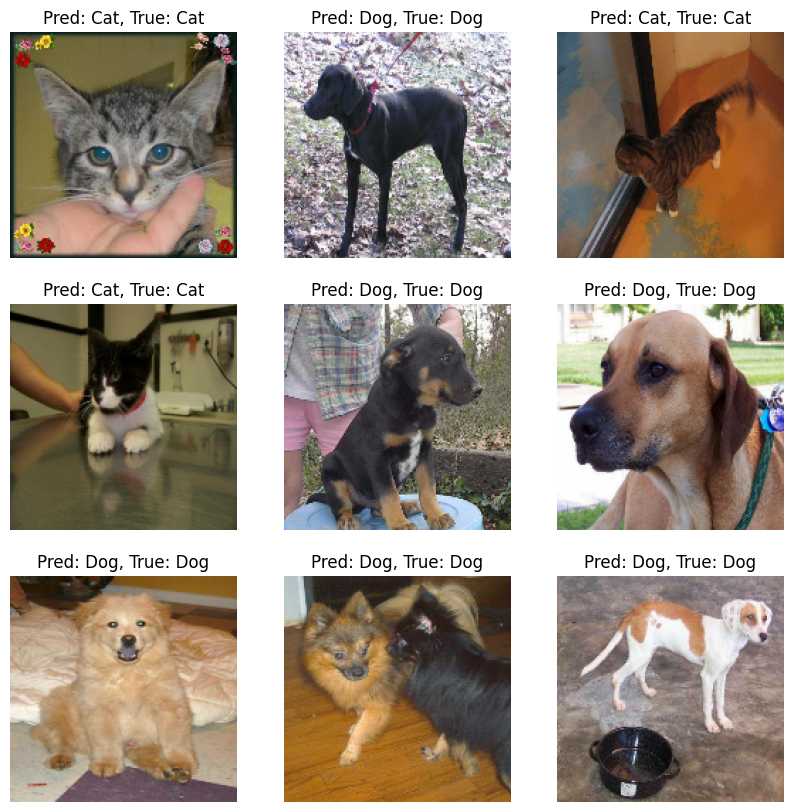

In [90]:
#Resposta
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

# URL e download do dataset de gatos e cachorros
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

# Definir o tamanho das imagens e o batch size
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

# Carregar os dados de treinamento e validação
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

# Função de formatação e normalização de imagem
def format_example(image, label):
    image = tf.cast(image, tf.float32)
    image = (image / 127.5) - 1  # Normaliza para [-1, 1]
    image = tf.image.resize(image, IMG_SIZE)
    return image, label

# Aplicando a função para transformar os datasets
train_dataset = train_dataset.map(format_example)
validation_dataset = validation_dataset.map(format_example)

# Split de validação e teste
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

# Preparação do dataset para performance
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

# Data augmentation para o treinamento
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
])

# Definir o shape de entrada da imagem
IMG_SHAPE = IMG_SIZE + (3,)

# Carregar o modelo MobileNetV2 pré-treinado
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

# Congelar o modelo base
base_model.trainable = False

# Adicionar a camada de pooling global e a densa final
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1)

# Construir o modelo completo
model = tf.keras.Sequential([
    data_augmentation,
    base_model,
    global_average_layer,
    prediction_layer
])

# Compilar o modelo para a primeira fase (camadas congeladas)
initial_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=initial_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Treinar o modelo com as camadas congeladas
history_frozen = model.fit(train_dataset,
                           validation_data=validation_dataset,
                           epochs=5)

# Função para visualizar imagens e previsões
def plot_predictions(dataset, model):
    class_names = ['Cat', 'Dog']  # Definindo as classes
    plt.figure(figsize=(10, 10))

    for images, labels in dataset.take(1):
        predictions = model.predict(images)
        predictions = tf.squeeze(tf.round(tf.sigmoid(predictions)))  # Ajuste para classificar 0 ou 1

        # Desnormalizar as imagens para a faixa original [0, 255]
        images = (images + 1) * 127.5  # Reverter para o intervalo original

        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))

            # Corrigir a previsão para classificação binária
            predicted_label = class_names[int(predictions[i])]  # 1 = 'Dog', 0 = 'Cat'
            true_label = class_names[int(labels[i])]  # Pegando o valor verdadeiro

            plt.title(f"Pred: {predicted_label}, True: {true_label}")
            plt.axis("off")
    plt.show()

# Exibir algumas previsões após o primeiro treinamento (camadas congeladas)
plot_predictions(train_dataset, model)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 244s 3s/step - accuracy: 0.9134 - loss: 0.2120 - val_accuracy: 0.9765 - val_loss: 0.0620
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 258s 3s/step - accuracy: 0.9552 - loss: 0.1057 - val_accuracy: 0.9790 - val_loss: 0.0535
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 213s 3s/step - accuracy: 0.9704 - loss: 0.0907 - val_accuracy: 0.9752 - val_loss: 0.0638
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 211s 3s/step - accuracy: 0.9786 - loss: 0.0565 - val_accuracy: 0.9691 - val_loss: 0.0865
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 259s 3s/step - accuracy: 0.9835 - loss: 0.0491 - val_accuracy: 0.9752 - val_loss: 0.0672
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


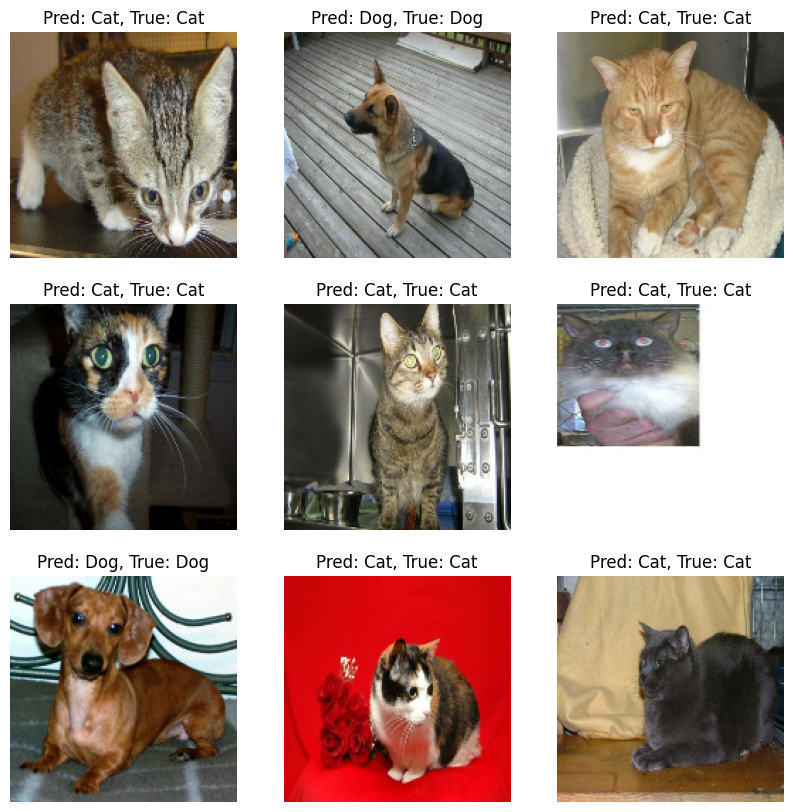

In [ ]:
# Descongelar o modelo inteiro para fine-tuning
base_model.trainable = True

# Compilar o modelo com um learning rate menor
fine_tune_learning_rate = initial_learning_rate / 10
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=fine_tune_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Treinar o modelo novamente com fine-tuning
history_finetune = model.fit(train_dataset,
                             validation_data=validation_dataset,
                             epochs=5)

# Exibir algumas previsões após o fine-tuning
plot_predictions(train_dataset, model)

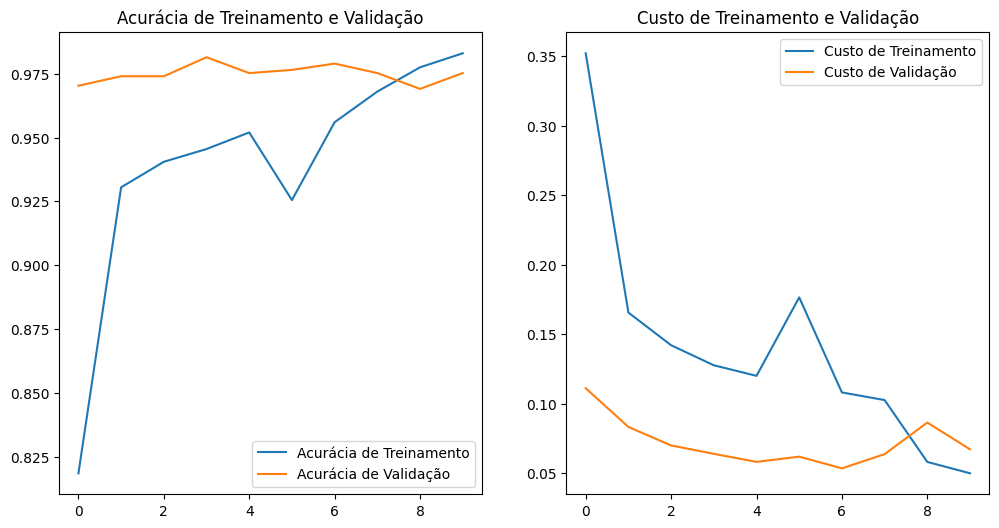

In [ ]:
# Plotar o desempenho de ambas as fases de treinamento
acc = history_frozen.history['accuracy'] + history_finetune.history['accuracy']
val_acc = history_frozen.history['val_accuracy'] + history_finetune.history['val_accuracy']
loss = history_frozen.history['loss'] + history_finetune.history['loss']
val_loss = history_frozen.history['val_loss'] + history_finetune.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treinamento')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de Treinamento e Validação')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Custo de Treinamento')
plt.plot(epochs_range, val_loss, label='Custo de Validação')
plt.legend(loc='upper right')
plt.title('Custo de Treinamento e Validação')
plt.show()

## 4.1. Execute os passos (35pt):




1. Carregue o modelo pré-treinado do MobileNet, remova a última camada.
2. Adicione uma camdada de Global Average Pooling 2D (GAP)
3. Adicione uma camada densa para ajustar ao seu número de classes e use ativação softmax
4. Use função de custo loss='sparse_categorical_crossentropy'
5. Dentre os dados de treinamento, reserve 10% para validação do modelo.
6. Treine por 10 épocas.
7. Plote os gráficos de custo do treino e validação


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step
Treinamento: (50000, 32, 32, 3), Validação: (10000, 32, 32, 3)
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 503s 311ms/step - accuracy: 0.2443 - loss: 2.1258 - val_accuracy: 0.3974 - val_loss: 1.7602
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 482s 308ms/step - accuracy: 0.4344 - loss: 1.5803 - val_accuracy: 0.4135 - val_loss: 1.8058
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 501s 308ms/step - accuracy: 0.4889 - loss: 1.4300 - val_accuracy: 0.4805 - val_loss: 1.5134
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 501s 308ms/step - accuracy: 0.5430 - loss: 1.2890 - val_accuracy: 0.5674 - val_loss: 1.2698
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 487s 311ms/step - accuracy: 0.5873 - loss: 1.1726 - val_accuracy: 0.5414 - val_loss: 1.4203
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 499s 310ms/step - accuracy: 0.6367 - loss: 1.0472 - val_accuracy: 0.6389 - val_loss: 1.0644
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 500s 308ms/step - accuracy: 0.6873 - 

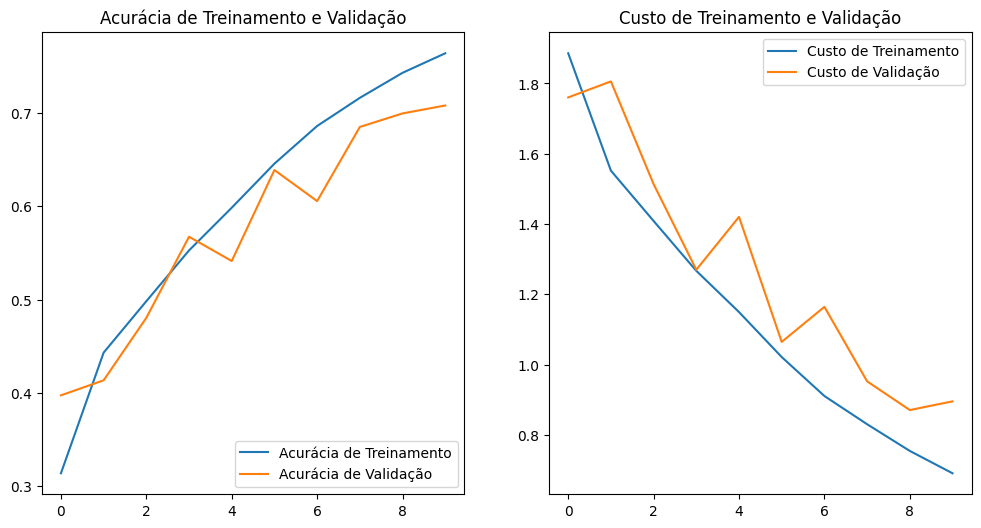

In [ ]:
# Resposta
# Importar e carregar CIFAR-10
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.applications import MobileNet
import matplotlib.pyplot as plt

(x_train, y_train), (x_val, y_val) = cifar10.load_data()

# Normalizar os dados
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0

# Verificar as formas dos dados
print(f"Treinamento: {x_train.shape}, Validação: {x_val.shape}")

# Ajustar o modelo MobileNet para 10 classes (CIFAR-10 tem 10 classes)
num_classes = 10

# Item 1 - Carregar o MobileNet sem a última camada
base_model = MobileNet(input_shape=(32, 32, 3), include_top=False, weights=None)

# Item 2 - Adicionar camada Global Average Pooling 2D (GAP)
x = layers.GlobalAveragePooling2D()(base_model.output)

# Item 3 - Adicionar uma camada densa para ajustar ao número de classes
output = layers.Dense(num_classes, activation='softmax')(x)

# Criar o modelo
model = models.Model(inputs=base_model.input, outputs=output)

# Item 4 - Compilar o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Itens 5 e 6 - Treinar o modelo
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=32
)

# Item 7 - Plote os gráficos de acurácia e perda
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treinamento')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de Treinamento e Validação')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Custo de Treinamento')
plt.plot(epochs_range, val_loss, label='Custo de Validação')
plt.legend(loc='upper right')
plt.title('Custo de Treinamento e Validação')
plt.show()

## 4.2. Fazendo testes (13pt)

Analize os gráficos. Você provavelmente deve ter observado overfitting.
Todo: Aplique algumas regularizações no modelo, para tentar reduzir o super-ajuste.Tente as opções abaixo:



1.   Dropout, antes da camada densa, de 50%
2.   Regularização nos pesos da camada densa (L1 ou L2)
3.   Dropout antes da camada de GAP



Veja exemplos no [link](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit)

Treinando com Dropout (50%) antes da camada densa...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 501s 307ms/step - accuracy: 0.2217 - loss: 2.3069 - val_accuracy: 0.3443 - val_loss: 1.9425
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 482s 308ms/step - accuracy: 0.4039 - loss: 1.6698 - val_accuracy: 0.4315 - val_loss: 1.6225
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 500s 307ms/step - accuracy: 0.4783 - loss: 1.4695 - val_accuracy: 0.5107 - val_loss: 1.3796
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 478s 306ms/step - accuracy: 0.5455 - loss: 1.3083 - val_accuracy: 0.5211 - val_loss: 1.4121
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 501s 305ms/step - accuracy: 0.5750 - loss: 1.2106 - val_accuracy: 0.5978 - val_loss: 1.1567
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 500s 304ms/step - accuracy: 0.6216 - loss: 1.0873 - val_accuracy: 0.6147 - val_loss: 1.1490
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 472s 302ms/step - accuracy: 0.6634 - loss: 0.9804 - val_accuracy: 0.5933 - val_loss: 1.3118
Epoch 8/1

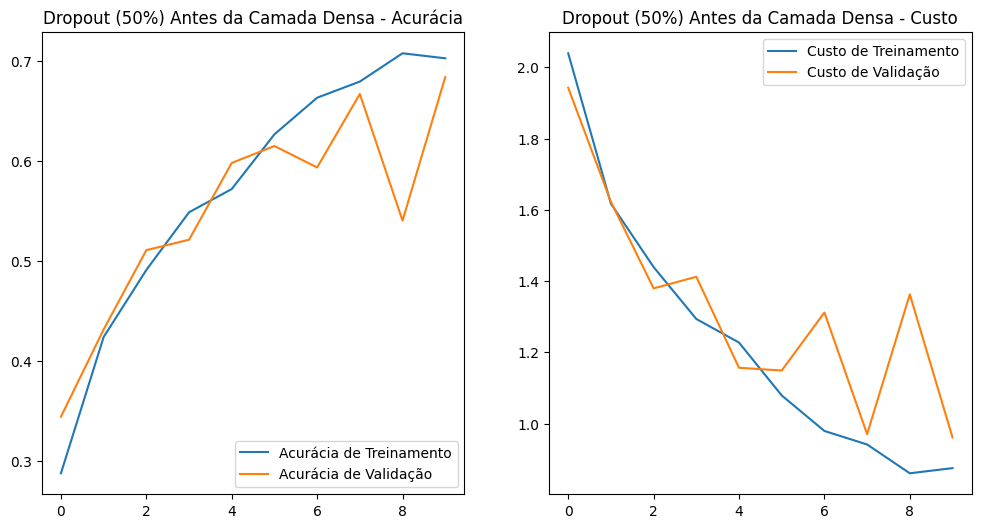

Treinando com regularização L2 na camada densa...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 489s 302ms/step - accuracy: 0.2536 - loss: 2.2242 - val_accuracy: 0.3928 - val_loss: 1.8164
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 501s 302ms/step - accuracy: 0.4308 - loss: 1.5914 - val_accuracy: 0.4675 - val_loss: 1.5761
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 500s 301ms/step - accuracy: 0.5083 - loss: 1.4037 - val_accuracy: 0.5090 - val_loss: 1.6179
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 503s 302ms/step - accuracy: 0.5747 - loss: 1.2371 - val_accuracy: 0.5703 - val_loss: 1.2858
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 503s 302ms/step - accuracy: 0.6232 - loss: 1.1079 - val_accuracy: 0.6269 - val_loss: 1.1389
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 501s 302ms/step - accuracy: 0.6694 - loss: 0.9890 - val_accuracy: 0.6161 - val_loss: 1.1801
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 501s 301ms/step - accuracy: 0.7053 - loss: 0.8915 - val_accuracy: 0.6744 - val_loss: 1.0323
Epoch 8/10
1

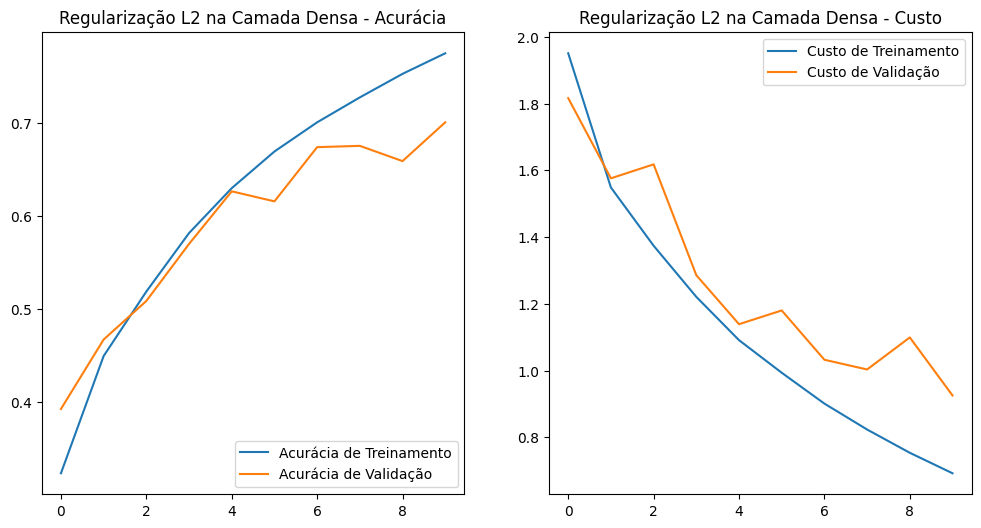

Treinando com Dropout (50%) antes da camada de GAP...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 490s 302ms/step - accuracy: 0.2359 - loss: 2.2401 - val_accuracy: 0.3710 - val_loss: 1.7508
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 473s 303ms/step - accuracy: 0.4021 - loss: 1.6751 - val_accuracy: 0.4016 - val_loss: 1.8539
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 472s 302ms/step - accuracy: 0.4594 - loss: 1.5111 - val_accuracy: 0.4365 - val_loss: 1.7189
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 501s 301ms/step - accuracy: 0.5046 - loss: 1.3988 - val_accuracy: 0.5397 - val_loss: 1.3832
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 503s 302ms/step - accuracy: 0.5560 - loss: 1.2566 - val_accuracy: 0.5387 - val_loss: 1.4257
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 500s 301ms/step - accuracy: 0.6024 - loss: 1.1416 - val_accuracy: 0.5907 - val_loss: 1.1770
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 505s 303ms/step - accuracy: 0.6184 - loss: 1.0944 - val_accuracy: 0.3814 - val_loss: 2.0860
Epoch 8/

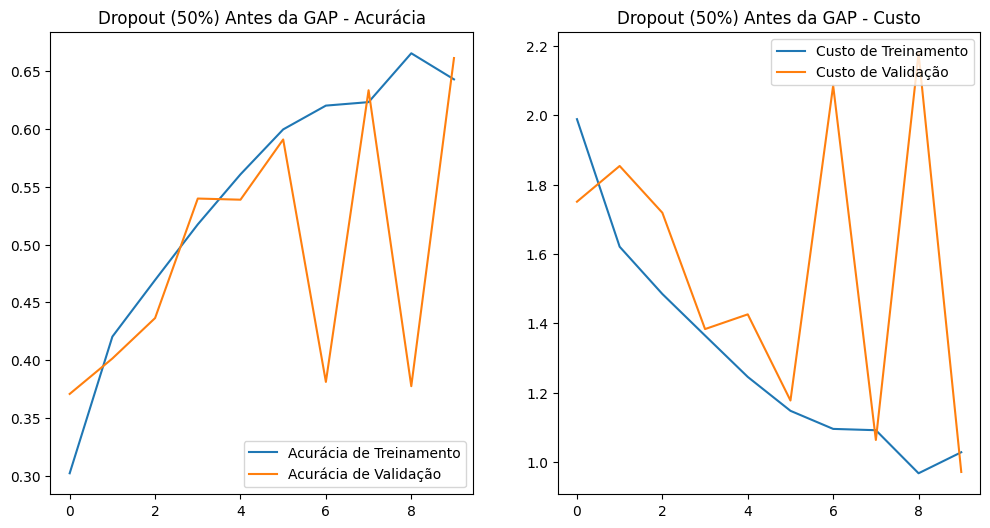

In [ ]:
#Resposta
# Função para treinar e avaliar o modelo com regularização
def train_with_regularization(dropout_rate=0, regularization=None, dropout_before_gap=False, title=""):
    # Carregar o MobileNet sem a última camada
    base_model = MobileNet(input_shape=(32, 32, 3), include_top=False, weights=None)

    # Adicionar Dropout antes da camada GAP, se necessário
    if dropout_before_gap:
        x = layers.Dropout(dropout_rate)(base_model.output)
    else:
        x = base_model.output

    # Adicionar a camada GAP
    x = layers.GlobalAveragePooling2D()(x)

    # Adicionar Dropout antes da camada densa, se necessário
    if not dropout_before_gap:
        x = layers.Dropout(dropout_rate)(x)

    # Adicionar a camada densa com regularização (L1 ou L2)
    if regularization:
        output = layers.Dense(num_classes, activation='softmax', kernel_regularizer=regularization)(x)
    else:
        output = layers.Dense(num_classes, activation='softmax')(x)

    # Criar o modelo
    model = models.Model(inputs=base_model.input, outputs=output)

    # Compilar o modelo
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Treinar o modelo
    history = model.fit(
        x_train, y_train,
        validation_data=(x_val, y_val),
        epochs=10,
        batch_size=32
    )

    # Plotar os gráficos
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(10)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Acurácia de Treinamento')
    plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
    plt.legend(loc='lower right')
    plt.title(f'{title} - Acurácia')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Custo de Treinamento')
    plt.plot(epochs_range, val_loss, label='Custo de Validação')
    plt.legend(loc='upper right')
    plt.title(f'{title} - Custo')
    plt.show()

# Opção 1: Dropout antes da camada densa (50%)
print("Treinando com Dropout (50%) antes da camada densa...")
train_with_regularization(dropout_rate=0.5, title="Dropout (50%) Antes da Camada Densa")

# Opção 2: Regularização L2 nos pesos da camada densa
print("Treinando com regularização L2 na camada densa...")
train_with_regularization(regularization=regularizers.l2(0.01), title="Regularização L2 na Camada Densa")

# Opção 3: Dropout antes da camada de GAP
print("Treinando com Dropout (50%) antes da camada de GAP...")
train_with_regularization(dropout_rate=0.5, dropout_before_gap=True, title="Dropout (50%) Antes da GAP")


### Responda (2pt)

**ToDo** - com qual configuração conseguiu resolver o overfitting?

### Ao aplicar o Dropout com taxa de 50%, induzimos o modelo a "desconsiderar" uma parte dos neurônios durante o treinamento, o que evita que o modelo se torne excessivamente dependente de certas conexões específicas e memorize os dados de treinamento. No entanto, como essa taxa é relativamente alta, o modelo "desativa" metade das unidades da camada densa em cada iteração. Isso ajudou a reduzir o overfitting nos valores mais baixos do gráfico de custo da validação, mas também gerou um aumento nos valores mais altos.

##Com a regularização L2, adicionamos um termo de penalidade baseado na soma dos quadrados dos pesos, o que favorece pesos menores e um ajuste mais regularizado. A expectativa era que essa regularização ajudasse a evitar que o modelo aprendesse pesos excessivamente grandes, contribuindo assim para a redução do overfitting. Esperava-se também que o gráfico de custo mostrasse uma diminuição da diferença entre os erros de treino e validação. Contudo, visualmente, não foi possível identificar melhorias claras ou uma correção do overfitting.

##Ao aplicar o Dropout antes da camada de Global Average Pooling (GAP), nossa expectativa era reduzir o overfitting ao "desativar" parte das ativações vindas da fase convolucional, forçando o modelo a generalizar melhor antes de passar a informação para a camada densa final. Também esperávamos uma diminuição na diferença entre os erros de treinamento e validação, mas ocorreu o oposto.

##Entre as três abordagens, a que apresentou melhor resultado foi a aplicação do Dropout com taxa de 50%.